In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid', {'axes.facecolor': '#FFC300'})
#colombia_palette = ['#FFC300', '#0072C6', '#CE1126']
#sns.set_palette(colombia_palette)


In [2]:

# Read the CSV file and skip the first 15 rows
df = pd.read_csv('colombia_population.csv', skiprows=15)

# Remove white spaces from column names
df.columns = df.columns.str.strip()

# Print the updated DataFrame
print(df)


          date  Population  Annual % Change
0   1950-12-31    11769748              NaN
1   1951-12-31    12087058             2.70
2   1952-12-31    12419968             2.75
3   1953-12-31    12767237             2.80
4   1954-12-31    13130649             2.85
..         ...         ...              ...
68  2018-12-31    49276961             1.91
69  2019-12-31    50187406             1.85
70  2020-12-31    50930662             1.48
71  2021-12-31    51516562             1.15
72  2022-12-31    51874024             0.69

[73 rows x 3 columns]


In [3]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year from date and overwrite date column
df['date'] = df['date'].dt.year


In [4]:
df['Population (millions)'] = df['Population'] / 1000000
df.drop('Population', axis=1, inplace=True)


In [5]:
print(df)


    date  Annual % Change  Population (millions)
0   1950              NaN              11.769748
1   1951             2.70              12.087058
2   1952             2.75              12.419968
3   1953             2.80              12.767237
4   1954             2.85              13.130649
..   ...              ...                    ...
68  2018             1.91              49.276961
69  2019             1.85              50.187406
70  2020             1.48              50.930662
71  2021             1.15              51.516562
72  2022             0.69              51.874024

[73 rows x 3 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   73 non-null     int64  
 1   Annual % Change        72 non-null     float64
 2   Population (millions)  73 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.8 KB


In [7]:
df.head(5)

,date,Annual % Change,Population (millions)
0,1950,NaN,11.769748
1,1951,2.70,12.087058
2,1952,2.75,12.419968
3,1953,2.80,12.767237
4,1954,2.85,13.130649


https://www.macrotrends.net/countries/COL/colombia/population

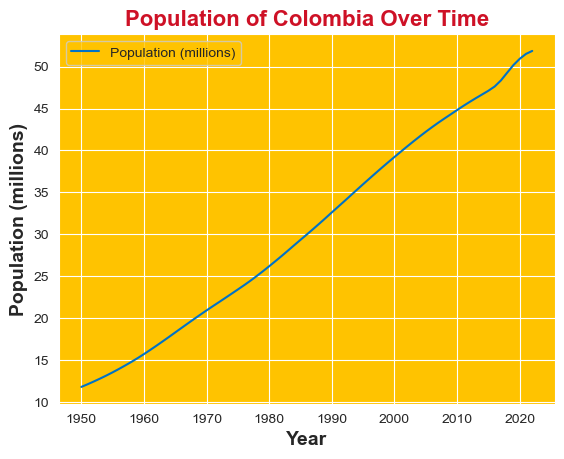

In [11]:
df.plot(x='date', y='Population (millions)', kind='line', color='#0072C6')
plt.title('Population of Colombia Over Time', fontweight='bold', fontsize=16, color='#CE1126')
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Population (millions)', fontweight='bold', fontsize=14)
plt.savefig('colombia_cities_population.png')
plt.show()


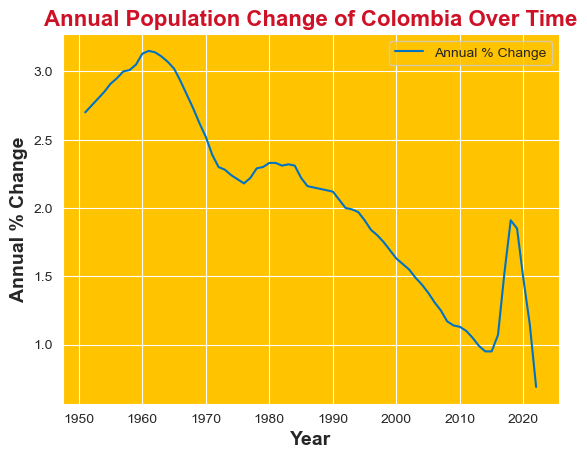

In [12]:
ax = df.plot(x='date', y='Annual % Change', kind='line', color='#0072C6')
plt.title('Annual Population Change of Colombia Over Time', fontweight='bold', fontsize=16, color='#CE1126')
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Annual % Change', fontweight='bold', fontsize=14)
plt.savefig('colombia_cities_population_change.png')
plt.show()


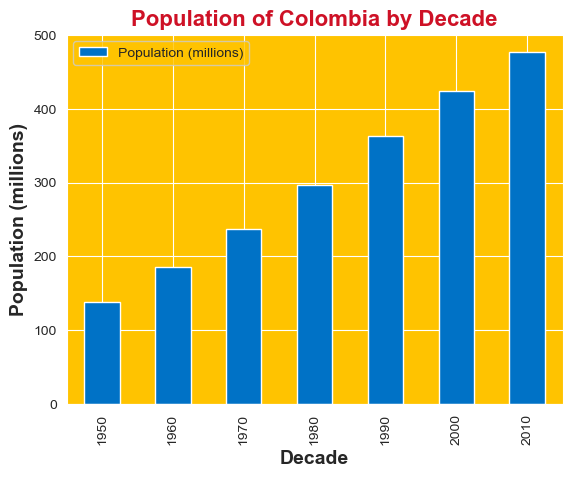

In [13]:
df['Decade'] = pd.cut(df['date'], bins=range(1950, 2030, 10), labels=range(1950, 2020, 10))
decade_df = df.groupby('Decade')['Population (millions)'].sum().reset_index()
ax = decade_df.plot(x='Decade', y='Population (millions)', kind='bar', stacked=True, color='#0072C6')
plt.title('Population of Colombia by Decade', fontweight='bold', fontsize=16, color='#CE1126')
plt.xlabel('Decade', fontweight='bold', fontsize=14)
plt.ylabel('Population (millions)',  fontweight='bold', fontsize=14)
plt.savefig('colombia_cities_population_bydecade.png')
plt.show()
